In [11]:
#Import Libraries
import numpy as np  
import pandas as pd  
import pandas_datareader as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [12]:
#Settings for Monte Carlo asset data, how long, and how many forecasts 
ticker = 'GDP' # ticker
t_intervals = 30 # time steps forecasted into future
iterations = 25 # amount of simulations

In [14]:
#Acquiring data
# data = pd.read_csv('D:\gmurn\OneDrive\Documents\ASU FinTech\Homework\Project 1\gdp_data_new.csv',index_col=0,usecols=['DATE', 'GDP'])
data = pd.read_csv('gdp_data.csv',index_col=0,usecols=['DATE', 'GDP'])
data = data.rename(columns={"Price": ticker}) #.reset_index()

In [15]:
#Preparing log returns from data
log_returns = np.log(1 + data.pct_change())

C:\Users\gmurn\anaconda3\envs\dev\lib\site-packages\pandas\plotting\_core.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


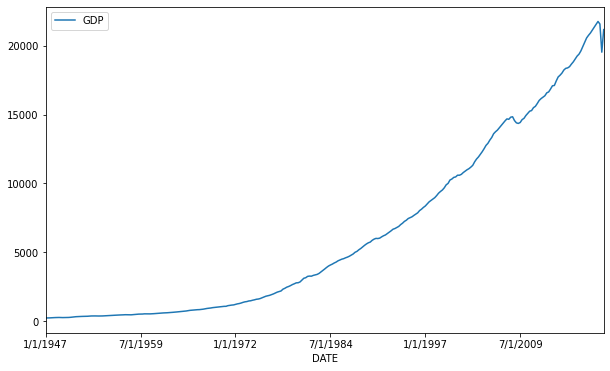

In [16]:
#Plot of asset historical closing price
data.plot(figsize=(10, 6));

C:\Users\gmurn\anaconda3\envs\dev\lib\site-packages\pandas\plotting\_core.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='DATE'>

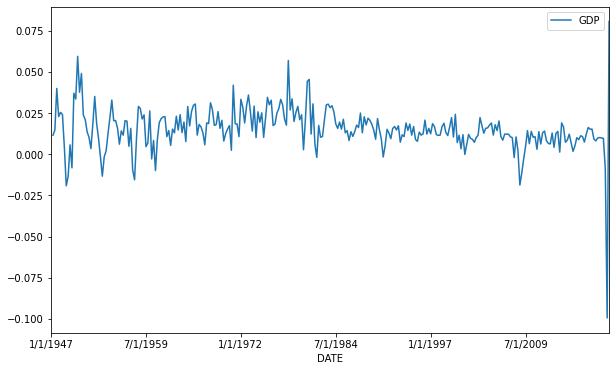

In [17]:
#Plot of log returns
log_returns.plot(figsize = (10, 6))

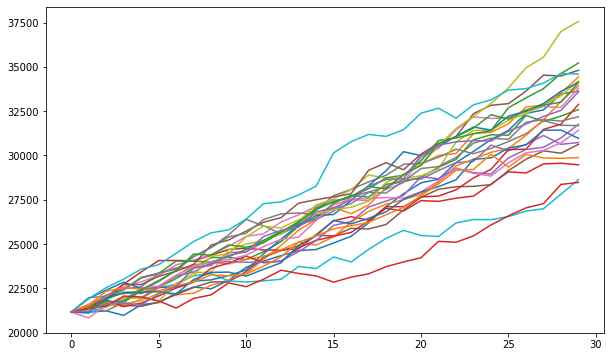

In [18]:
#Setting up drift and random component in relation to asset data
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5 * var)
stdev = log_returns.std()
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))
#Takes last data point as startpoint point for simulation
S0 = data.iloc[-1]
price_list = np.zeros_like(daily_returns)
price_list[0] = S0
#Applies Monte Carlo simulation in asset
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

#Plot simulations
plt.figure(figsize=(10,6))
plt.plot(price_list);